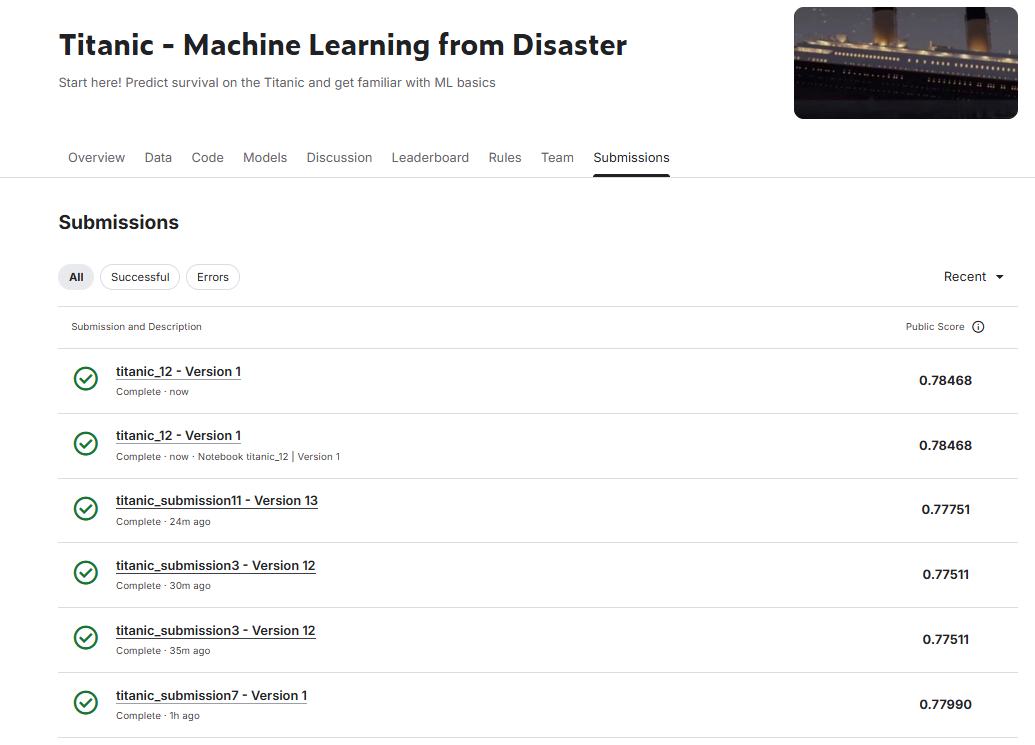

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 1. 데이터 불러오기

In [ ]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test  = pd.read_csv("/kaggle/input/titanic/test.csv")

In [ ]:
train.head()

In [ ]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [ ]:
train_data = train[features + ["Survived"]].copy()
test_data  = test[features].copy()

# 2. 결측치 처리

In [ ]:
# Age: Train 데이터의 중앙값(median)으로 채움
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"] = test_data["Age"].fillna(train_data["Age"].median())

In [ ]:
# Embarked: Train 데이터의 최빈값(mode)으로 채움
train_data["Embarked"] = train_data["Embarked"].fillna(train_data["Embarked"].mode()[0])
test_data["Embarked"] = test_data["Embarked"].fillna(train_data["Embarked"].mode()[0])

In [ ]:
# Fare: Train 데이터의 중앙값(median)으로 채움
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].median())
test_data["Fare"] = test_data["Fare"].fillna(train_data["Fare"].median())

# 3. One-Hot Encoding

In [ ]:
train_data = pd.get_dummies(train_data)
test_data  = pd.get_dummies(test_data)

# 4. 데이터 분리

In [ ]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [ ]:
test_data = test_data.reindex(columns=X.columns, fill_value=0)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 5. 모델 학습

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model.fit(X_train, y_train)

In [ ]:
val_pred = model.predict(X_val)
val_score = accuracy_score(y_val, val_pred)
print(f"Validation Accuracy Score: {val_score:.4f}")

In [ ]:
model_full = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
model_full.fit(X, y)

In [ ]:
predictions = model_full.predict(test_data)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions.astype(int)
})

# 파일 저장
submission.to_csv("submission.csv", index=False)

print("\nSubmission preview:")
print(submission.head())